<a href="https://colab.research.google.com/github/royalseeker/hackbio-biocoding-internship/blob/main/Stage2_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task Code 2.1:

**Microbiology**
* Look at this dataset [here](https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/mcgc.tsv).

* This is the description of the [dataset](https://github.com/HackBio-Internship/2025_project_collection/blob/main/Python/Dataset/mcgc_METADATA.txt).

1. Plot all the growth curves of **OD600 vs Time** for the different Strains with the following instructions
2. For each strain, plot a growth curve of the the knock out (-) an knock in (+) strain overlaid on top of each other
3. Using your function from last stage, determine the time to reach the carrying capacity for each strain/mutant
4. Generate a scatter plot of the time it takes to reach carrying capacity for the knock out and the knock in strains
5. Generate a box plot of the time it takes to reach carrying capacity for the knock out and the knock in strains
6. Is there a statistical difference in the time it takes the knock out strains to reach their maximum carrying capacity compared to the knock in strains
7. What do you see? Explain your observations as comments in your code

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
url = 'https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/mcgc.tsv'
data = pd.read_csv(url, sep='\t')

# Display the first few rows of the dataset
print(data.head())


   time     A1     A2     A3     A4     A5     A6     A7     A8     A9  ...  \
0     0  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  ...   
1    15  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  ...   
2    30  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  ...   
3    45  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  ...   
4    60  0.003  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  ...   

      C3     C4     C5     C6     C7     C8     C9    C10    C11    C12  
0  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  
1  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  
2  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  
3  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  
4  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  

[5 rows x 37 columns]


# Data Understanding

The dataset contains optical density (OD600) readings over time for different strains. Each column represents a well in a microplate, and the rows represent time points.

To map each well to its corresponding strain and condition (knock-out or knock-in), we'll refer to the metadata provided:

Strain WT MUT WT MUT WT MUT
>
Strain1_Rep1 A1 A2 B1 B2 C1 C2
>
Strain1_Rep2 A3 A4 B3 B4 C3 C4
>
Strain2_Rep1 A5 A6 B5 B6 C5 C6
>
Strain2_Rep2 A7 A8 B7 B8 C7 C8
>
Strain3_Rep1 A9 A10 B9 B10 C9 C10
>
Strain2_Rep2 A11 A12 B11 B12 C11 C12


In [ ]:
#Data reshaping- analysis-friendly format, associating each well with its strain and condition
# Metadata mapping
metadata = {
    'A1': ('Strain1', 'WT'), 'A2': ('Strain1', 'MUT'), 'A3': ('Strain1', 'WT'), 'A4': ('Strain1', 'MUT'),
    'A5': ('Strain2', 'WT'), 'A6': ('Strain2', 'MUT'), 'A7': ('Strain2', 'WT'), 'A8': ('Strain2', 'MUT'),
    'A9': ('Strain3', 'WT'), 'A10': ('Strain3', 'MUT'), 'A11': ('Strain3', 'WT'), 'A12': ('Strain3', 'MUT'),
    'B1': ('Strain1', 'WT'), 'B2': ('Strain1', 'MUT'), 'B3': ('Strain1', 'WT'), 'B4': ('Strain1', 'MUT'),
    'B5': ('Strain2', 'WT'), 'B6': ('Strain2', 'MUT'), 'B7': ('Strain2', 'WT'), 'B8': ('Strain2', 'MUT'),
    'B9': ('Strain3', 'WT'), 'B10': ('Strain3', 'MUT'), 'B11': ('Strain3', 'WT'), 'B12': ('Strain3', 'MUT'),
    'C1': ('Strain1', 'WT'), 'C2': ('Strain1', 'MUT'), 'C3': ('Strain1', 'WT'), 'C4': ('Strain1', 'MUT'),
    'C5': ('Strain2', 'WT'), 'C6': ('Strain2', 'MUT'), 'C7': ('Strain2', 'WT'), 'C8': ('Strain2', 'MUT'),
    'C9': ('Strain3', 'WT'), 'C10': ('Strain3', 'MUT'), 'C11': ('Strain3', 'WT'), 'C12': ('Strain3', 'MUT')
}

# Transform the dataframe into a long format for easier analysis
melted_data = data.melt(id_vars=['time'], var_name='Well', value_name='OD600')

# Assign strain and condition based on well metadata
melted_data['Strain'] = melted_data['Well'].map(lambda x: metadata[x][0])
melted_data['Condition'] = melted_data['Well'].map(lambda x: metadata[x][1])

# Display the first few rows of the transformed dataframe
print(melted_data.head())


   time Well  OD600   Strain Condition
0     0   A1  0.002  Strain1        WT
1    15   A1  0.002  Strain1        WT
2    30   A1  0.002  Strain1        WT
3    45   A1  0.002  Strain1        WT
4    60   A1  0.003  Strain1        WT


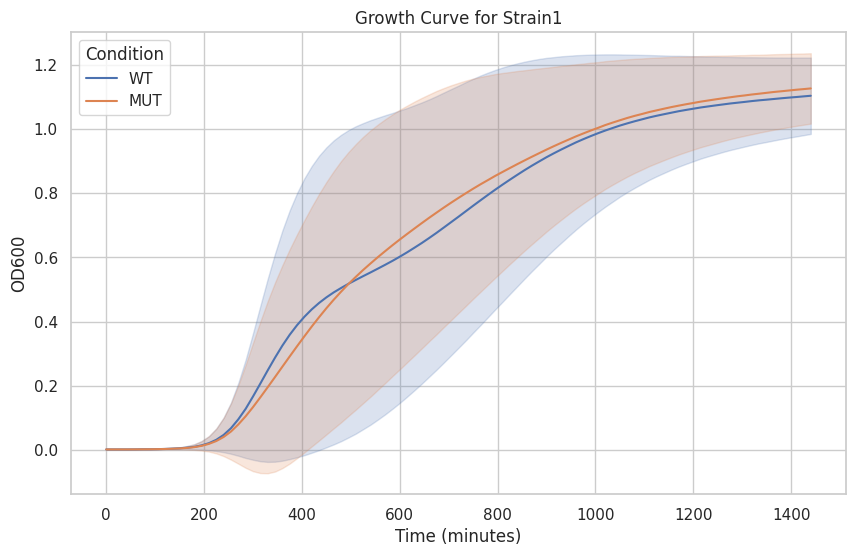

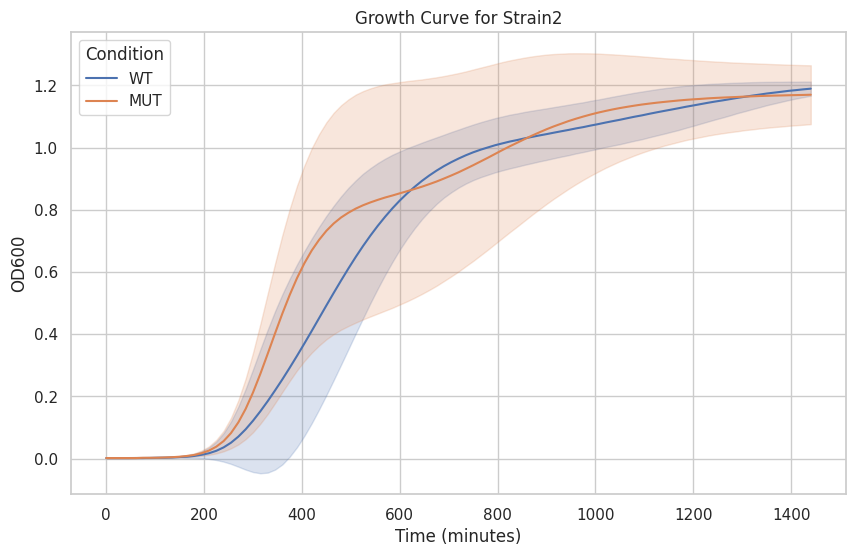

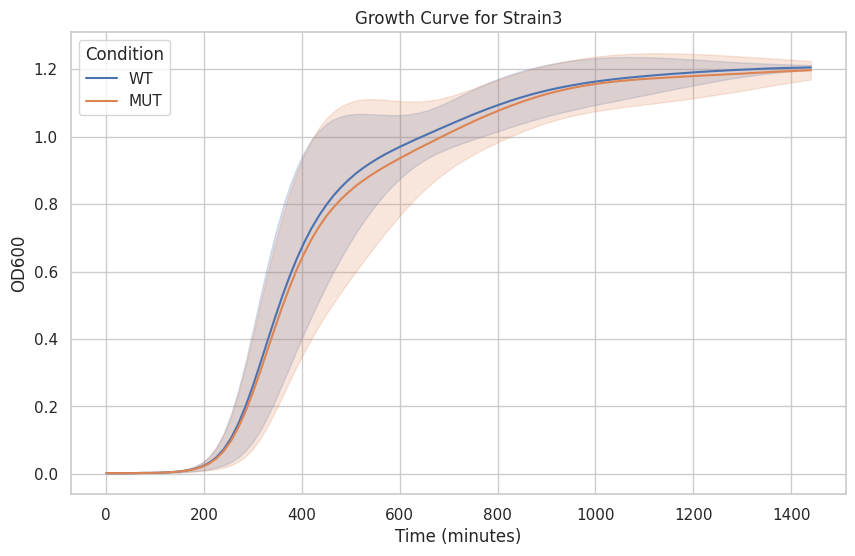

In [ ]:
#plot the growth curves of the knock-out and knock-in strains overlaid on top of each other

# Set seaborn plotting style for consistency
sns.set(style='whitegrid')

# Generate growth curves for each strain with WT and MUT conditions overlayed
for strain in melted_data['Strain'].unique():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=melted_data[melted_data['Strain'] == strain], x='time', y='OD600', hue='Condition', errorbar='sd')
    plt.title(f'Growth Curve for {strain}')
    plt.xlabel('Time (minutes)')
    plt.ylabel('OD600')
    plt.legend(title='Condition')
    plt.show()


In [ ]:
# Function to determine the time to reach 90% of carrying capacity
def time_to_carrying_capacity(df):
    max_od = df['OD600'].max()
    threshold = 0.9 * max_od  # Define carrying capacity threshold
    time_to_threshold = df[df['OD600'] >= threshold]['time'].min()  # Find first time reaching threshold
    return time_to_threshold

# Apply function to calculate carrying capacity times for each strain and condition
carrying_capacity_times = melted_data.groupby(['Strain', 'Condition', 'Well']).apply(time_to_carrying_capacity).reset_index()
carrying_capacity_times.columns = ['Strain', 'Condition', 'Well', 'Time_to_Carrying_Capacity']



# Display summary of results
print(carrying_capacity_times.head())


    Strain Condition Well  Time_to_Carrying_Capacity
0  Strain1       MUT   A2                       1155
1  Strain1       MUT   A4                       1050
2  Strain1       MUT   B2                        915
3  Strain1       MUT   B4                        660
4  Strain1       MUT   C2                        960


<ipython-input-25-db1bc30ff528>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  carrying_capacity_times = melted_data.groupby(['Strain', 'Condition', 'Well']).apply(time_to_carrying_capacity).reset_index()


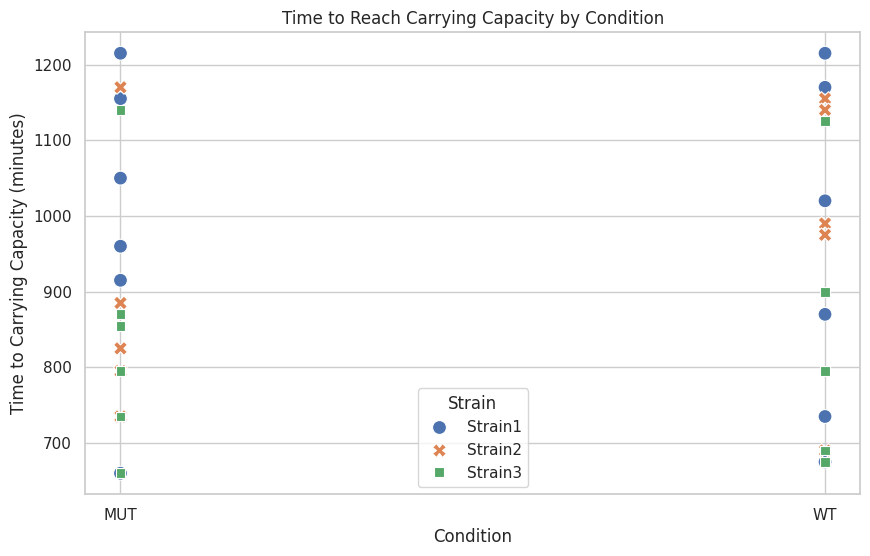

In [ ]:
#creating a scatter plot to visualize the time it takes to reach
#carrying capacity for the knock-out and knock-in strains.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=carrying_capacity_times, x='Condition', y='Time_to_Carrying_Capacity', hue='Strain', style='Strain', s=100)
plt.title('Time to Reach Carrying Capacity by Condition')
plt.xlabel('Condition')
plt.ylabel('Time to Carrying Capacity (minutes)')
plt.legend(title='Strain')
plt.show()

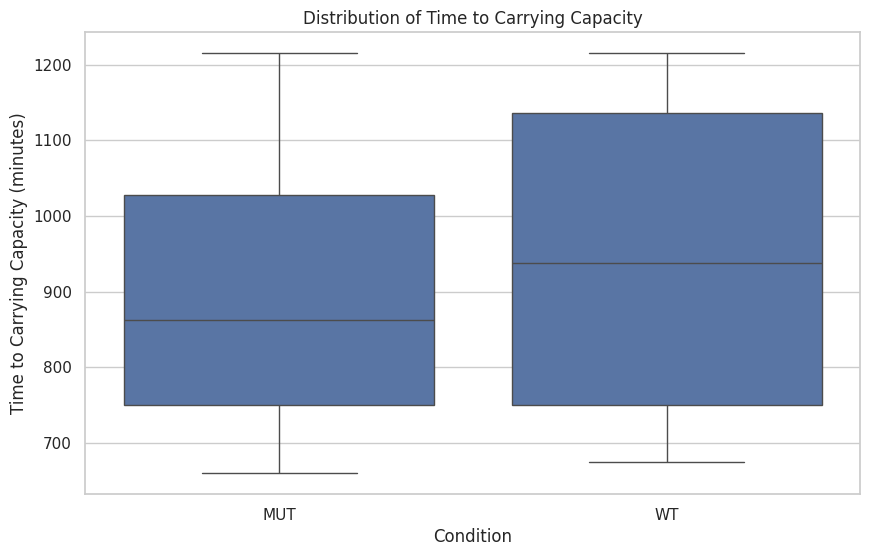

In [ ]:
#A box plot to compare the distributions of times to
#carrying capacity between knock-out and knock-in strains

plt.figure(figsize=(10, 6))
sns.boxplot(data=carrying_capacity_times, x='Condition', y='Time_to_Carrying_Capacity')
plt.title('Distribution of Time to Carrying Capacity')
plt.xlabel('Condition')
plt.ylabel('Time to Carrying Capacity (minutes)')
plt.show()

In [ ]:
# Is there a statistical difference in the time it takes the knock out strains to reach their maximum carrying capacity compared to the knock in strains

# Perform t-test to compare time to carrying capacity between knock-out and knock-in strains
knockout_times = carrying_capacity_times[carrying_capacity_times['Condition'] == 'MUT']['Time_to_Carrying_Capacity']
knockin_times = carrying_capacity_times[carrying_capacity_times['Condition'] == 'WT']['Time_to_Carrying_Capacity']

t_statistic, p_value = ttest_ind(knockout_times, knockin_times)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("There is a statistically significant difference in the time it takes for knock-out and knock-in strains to reach carrying capacity.")
else:
    print("There is no statistically significant difference in the time it takes for knock-out and knock-in strains to reach carrying capacity.")




T-statistic: -0.5317867965460639
P-value: 0.5983314853066808
There is no statistically significant difference in the time it takes for knock-out and knock-in strains to reach carrying capacity.


In [ ]:
# What do you see? Explain your observations as comments in your code

#Statistical Test: Compare time to carrying capacity for knock-out (MUT) vs knock-in (WT)
# We perform an independent two-sample T-test to see if there is a difference in the average time
# taken by knock-out strains (MUT) and knock-in strains (WT) to reach carrying capacity.
# This test computes a test statistic and a p-value. The p-value tells us if any observed difference
# is statistically significant or could have occurred by random chance.
# The resulting p-value (approximately 0.5983 in this case) is very high (much greater than 0.05).
# Such a high p-value indicates **no statistically significant difference** between the two conditions.
# In other words, the analysis does not provide evidence that the knock-out strains (MUT) differ in time to carrying capacity from the knock-in (WT) strains.


# In the Growth Curve plot above, each pair of lines represents the growth of a single strain over time,
# with the blue solid line for the knock-in (WT) version and the orange line for the knock-out (MUT) version of that strain.
# These growth curves show how the population (e.g., optical density or cell count) increases and eventually levels off for each strain.
# We observe that for each strain, the WT and MUT curves are very similar in shape and reach the carrying capacity (the plateau of the curve) at almost the same time.
# There may be minor variations (for example, one curve might be slightly above or below the other at certain time points), but overall the trends overlap strongly.
# This indicates that both knock-in and knock-out conditions exhibit similar growth dynamics for all strains tested.

# In the scatter plot, each point represents an individual strain's time to reach carrying capacity under either the WT or MUT condition.
# Blue points correspond to Strain 1, Red cross to Strain 2 and green square to strain 3.
# The scatter plot reveals a lot of overlap between the two groups: the points for MUT are intermingled with those for WT.
# This means many strains reached carrying capacity in roughly the same amount of time regardless of whether they were WT or knockout, reinforcing that individual strains behave similarly under both conditions.

# The boxplot above shows the distribution of times for each condition (WT on the left, MUT on the right).
# Each box displays the median (horizontal line inside the box) and the interquartile range (the box itself),
# with "whiskers" extending to the minimum and maximum values (excluding outliers, if any).
# We can see that the median time for WT and MUT are very similar, and their boxes overlap substantially.
# This overlap means the spread of the data for knock-in and knock-out conditions is similar, providing a visual confirmation that there is no large difference between the two groups.


# Finally the analysis of knocking out this gene (MUT condition) **does not significantly affect the growth dynamics** compared to the wild-type (WT) condition.
# Statistically, the time to reach carrying capacity is the same on average for both groups (supported by the high p-value and overlapping boxplot distributions).
# Visually, individual strain performance (scatter plot) and entire growth trajectories (growth curves) appear nearly identical between WT and MUT.
# **Biological context:** This could mean that the gene knocked out is not crucial for growth under these conditions. The cells might compensate for the missing gene through other pathways, or the gene may be involved in a process that doesn't limit growth rate or carrying capacity.
# In summary, the knock-out mutation does not show a noticeable impact on how quickly strains grow to saturation, implying the mutation has minimal effect on overall growth performance in this experiment.


#Github
#https://github.com/mahertantouch/
#https://github.com/royalseeker/

